<a href="https://colab.research.google.com/github/yewcheng/Stock-Price-Prediction/blob/main/DAC_AAPL_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [35]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving AAPL_prediction.csv to AAPL_prediction.csv


In [36]:
# Store the data into a data frame
df = pd.read_csv('AAPL_prediction.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400
1,2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800
2,2022-03-03,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
3,2022-03-04,164.490005,165.550003,162.100006,163.169998,162.187515,83737200
4,2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340836,96418800
5,2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492004,131148300


In [37]:
# Get the number of trading days
df.shape

(267, 7)

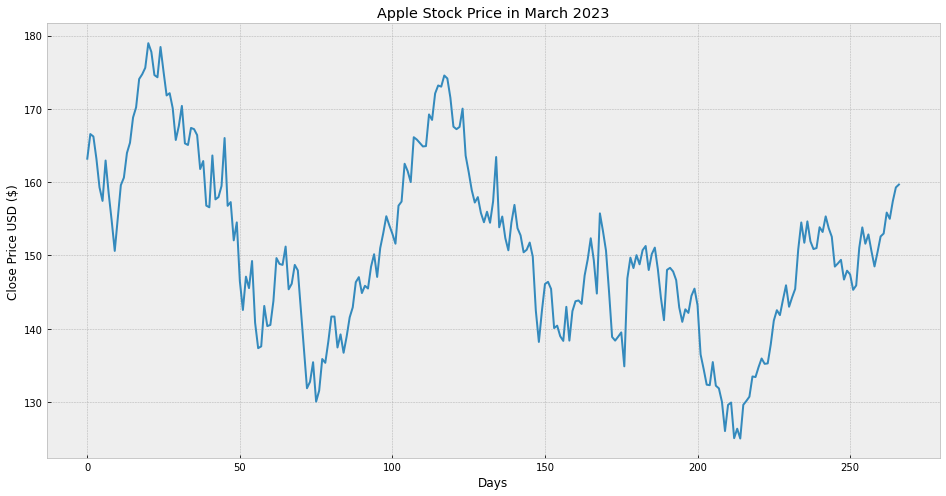

In [40]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Apple Stock Price in March 2023')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [41]:
# Get the Close price
df = df[['Close']]
df.head(4)


,Close
0,163.199997
1,166.559998
2,166.229996
3,163.169998


In [42]:
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,163.199997,175.059998
1,166.559998,171.830002
2,166.229996,172.139999
3,163.169998,170.089996


In [43]:
# Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1)) [:-future_days]
print(X)

[[163.199997]
 [166.559998]
 [166.229996]
 [163.169998]
 [159.300003]
 [157.440002]
 [162.949997]
 [158.520004]
 [154.729996]
 [150.619995]
 [155.089996]
 [159.589996]
 [160.619995]
 [163.979996]
 [165.380005]
 [168.820007]
 [170.210007]
 [174.070007]
 [174.720001]
 [175.600006]
 [178.960007]
 [177.770004]
 [174.610001]
 [174.309998]
 [178.440002]
 [175.059998]
 [171.830002]
 [172.139999]
 [170.089996]
 [165.75    ]
 [167.660004]
 [170.399994]
 [165.289993]
 [165.070007]
 [167.399994]
 [167.229996]
 [166.419998]
 [161.789993]
 [162.880005]
 [156.800003]
 [156.570007]
 [163.639999]
 [157.649994]
 [157.960007]
 [159.479996]
 [166.020004]
 [156.770004]
 [157.279999]
 [152.059998]
 [154.509995]
 [146.5     ]
 [142.559998]
 [147.110001]
 [145.539993]
 [149.240005]
 [140.820007]
 [137.350006]
 [137.589996]
 [143.110001]
 [140.360001]
 [140.520004]
 [143.779999]
 [149.639999]
 [148.839996]
 [148.710007]
 [151.210007]
 [145.380005]
 [146.139999]
 [148.710007]
 [147.960007]
 [142.639999]
 [137.

<ipython-input-43-47414a5f82be>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1)) [:-future_days]


In [44]:
# Create the target data set (y) and convert it to a numpy array and get all the target values except the last 'x' rows/days
y = np.array(df['Prediction']) [:-future_days]
print(y)


[175.059998 171.830002 172.139999 170.089996 165.75     167.660004
 170.399994 165.289993 165.070007 167.399994 167.229996 166.419998
 161.789993 162.880005 156.800003 156.570007 163.639999 157.649994
 157.960007 159.479996 166.020004 156.770004 157.279999 152.059998
 154.509995 146.5      142.559998 147.110001 145.539993 149.240005
 140.820007 137.350006 137.589996 143.110001 140.360001 140.520004
 143.779999 149.639999 148.839996 148.710007 151.210007 145.380005
 146.139999 148.710007 147.960007 142.639999 137.130005 131.880005
 132.759995 135.429993 130.059998 131.559998 135.869995 135.350006
 138.270004 141.660004 141.660004 137.440002 139.229996 136.720001
 138.929993 141.559998 142.919998 146.350006 147.039993 144.869995
 145.860001 145.490005 148.470001 150.169998 147.070007 151.
 153.039993 155.350006 154.089996 152.949997 151.600006 156.789993
 157.350006 162.509995 161.509995 160.009995 166.130005 165.809998
 165.350006 164.869995 164.919998 169.240005 168.490005 172.100006
 

In [45]:
# Split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [46]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [47]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-47-dadad65cbff3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[130.729996],
       [133.490005],
       [133.410004],
       [134.759995],
       [135.940002],
       [135.210007],
       [135.270004],
       [137.869995],
       [141.110001],
       [142.529999],
       [141.860001],
       [143.960007],
       [145.929993],
       [143.      ],
       [144.289993],
       [145.429993],
       [150.820007],
       [154.5     ],
       [151.729996],
       [154.649994],
       [151.919998],
       [150.869995],
       [151.009995],
       [153.850006],
       [153.199997]])

In [48]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[155.330002 153.710007 152.550003 148.479996 148.910004 149.399994
 146.710007 147.919998 125.019997 138.880005 145.910004 151.070007
 173.029999 151.600006 152.869995 146.869995 148.5      150.470001
 152.589996 165.070007 155.850006 148.5      167.229996 143.75
 142.910004]

[147.47820142 147.74152647 147.73389379 147.8626928  147.9752741
 147.90562724 147.91135139 148.15940956 148.46852983 148.60400803
 148.54008532 148.74044126 148.92839233 148.64884956 148.77192433
 148.88068867 149.39493544 149.7460337  149.48175505 149.76034422
 149.49988263 149.39970466 149.41306169 149.68401951 149.6220039 ]


<ipython-input-49-efd87df4409a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


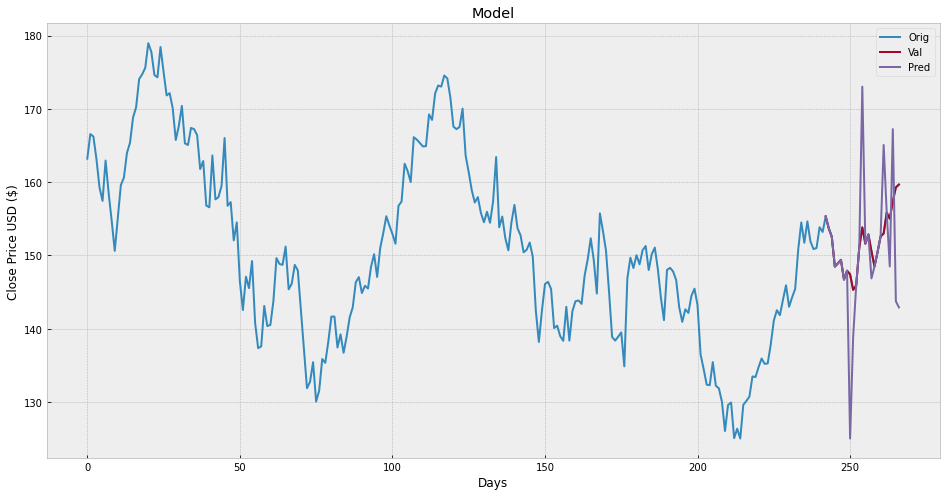

In [49]:
# Visualise the Data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-50-dd7327c113ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


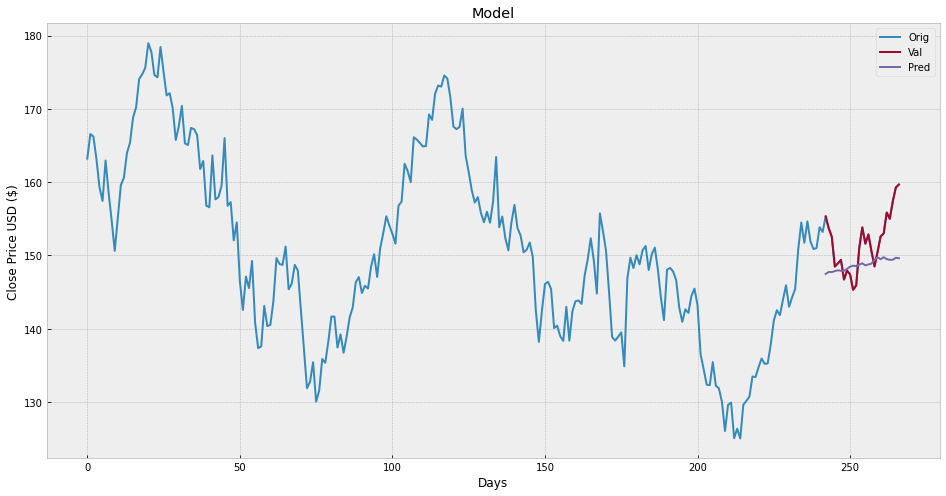

In [50]:
# Visualise the Data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()